In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
# CRITICAL FIX: The file uses semi-colons (;) as separators, not commas
df = pd.read_csv('bank-full.csv', sep=';')

# Inspect the first few rows to ensure it loaded correctly
print(df.head())
print(df.info())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  

In [3]:
# 1. Convert the target variable 'y' ('yes'/'no') to numbers (1/0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# 2. Identify categorical columns (text) vs numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# 3. One-Hot Encoding: Convert text columns into binary columns
# (e.g., 'marital' becomes 'marital_single', 'marital_married', etc.)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")
# You will see the number of columns increase significantly—this is normal!

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='str')
Original shape: (45211, 17)
Encoded shape: (45211, 43)


C:\Users\admin\AppData\Local\Temp\ipykernel_17768\3487117382.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns


In [4]:
# Split features (X) and target (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
# We limit max_depth to 3 so the tree is readable (interpretable)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model
clf.fit(X_train, y_train)

print("Model Trained Successfully!")

Model Trained Successfully!


Model Accuracy: 0.89


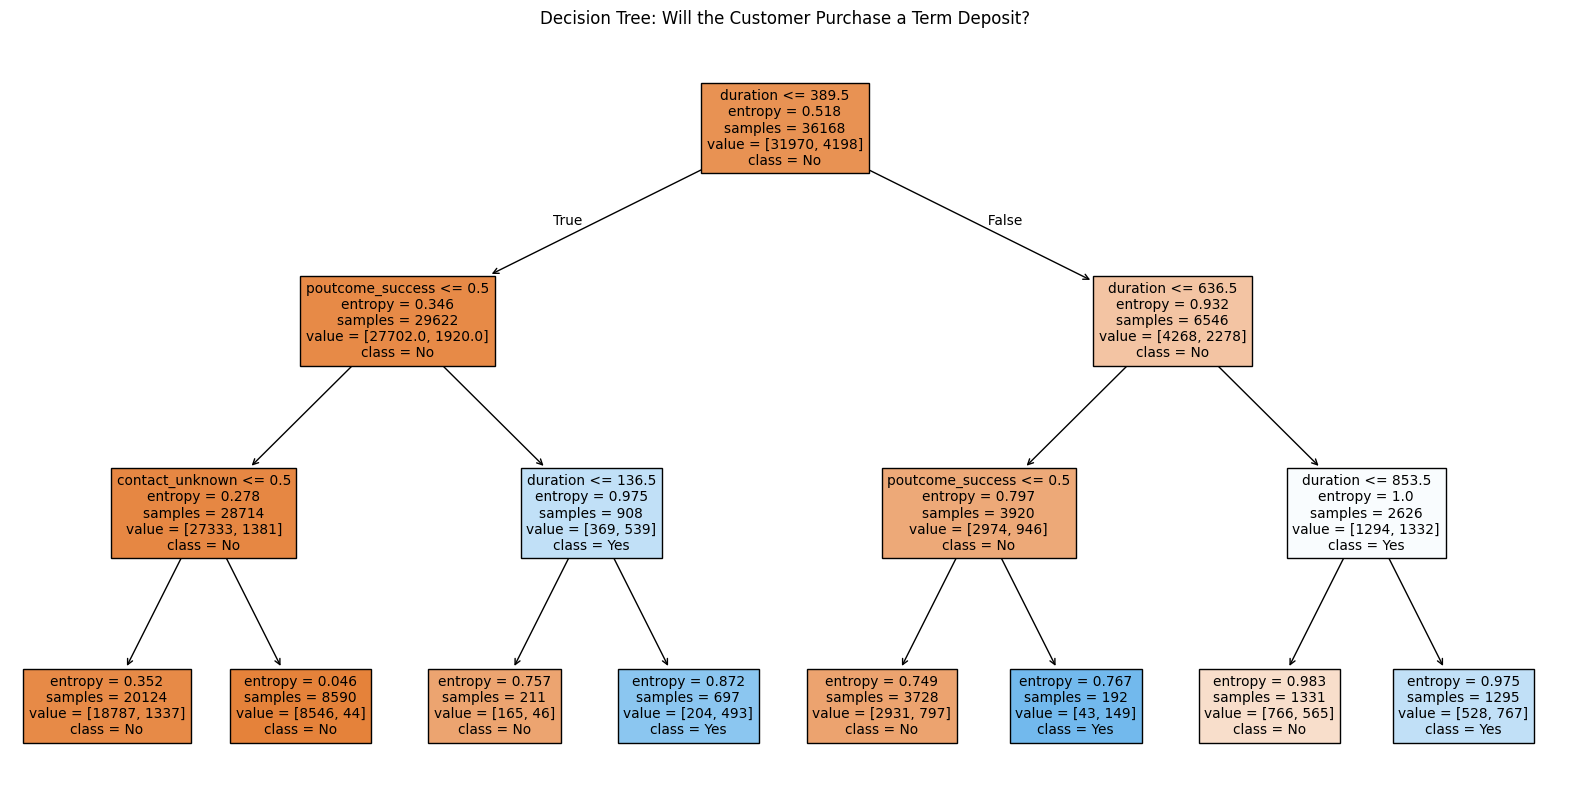

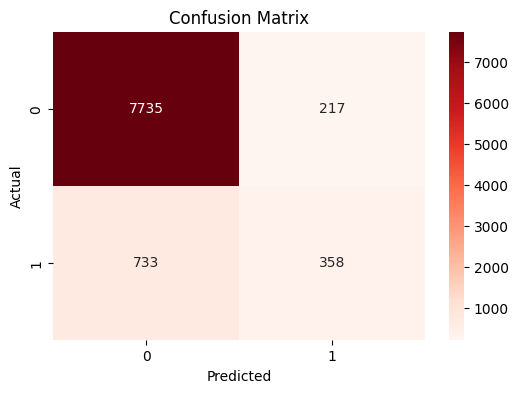

In [5]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualizing the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree: Will the Customer Purchase a Term Deposit?')
plt.show()

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()